<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Pre_processing_dataset_yudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration des données


In [3]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix


Télechargement du dataset

In [4]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv

--2023-05-15 14:52:12--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-15 14:52:12 (16.8 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-15 14:52:12--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [5]:
!ls

sample_data  testinputs.csv  traininginputs.csv  trainingoutput.csv


In [6]:
df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')


**Training Inputs**

In [121]:
df_training_inputs.shape

(34515, 21)

Changement des noms

In [8]:
df_training_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [122]:
df_training_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PROC_TRACEINFO             34515 non-null  object 
 1   Premier angle              34515 non-null  object 
 2   SnapRingPeakForce          34515 non-null  object 
 3   Deuxième angle             34515 non-null  object 
 4   Rodage_I                   34515 non-null  float64
 5   SnapRingFinalStroke        34515 non-null  float64
 6   Vissage_M8_torque          34515 non-null  object 
 7   Capuchon_insertion         34515 non-null  object 
 8   Rodage_U                   34515 non-null  float64
 9   V1_torque                  34515 non-null  float64
 10  StartLinePeakForce         34515 non-null  float64
 11  Vissage_M8_angle           34515 non-null  float64
 12  SnapRingMidPointForce      34515 non-null  float64
 13  V2_torque                  34515 non-null  flo

In [10]:
with pd.option_context('display.max_columns', df_training_inputs.shape[1]):
    print(df_training_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                        34515   34515.000000       34515.000000   
unique                       34515            NaN                NaN   
top     I-B-XA1207672-190429-00688            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.906922         156.915055   
std                            NaN      15.662650          11.271492   
min                            NaN     101.800000           0.000000   
25%                            NaN     148.700000         149.210000   
50%                            NaN     158.000000         156.180000   
75%                            NaN     169.300000         164.380000   
max                            NaN     198.300000         196.920000   

        Deuxième angle      Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count     34515.000000  34515.000000         34515.0000

**Test Inputs**

In [11]:
df_test_inputs.shape

(8001, 14)

In [12]:
df_test_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [13]:
df_test_inputs.describe()

,Premier angle,SnapRingPeakForce,Deuxième angle,Rodage_I,SnapRingFinalStroke,Vissage_M8_torque,Capuchon_insertion,Rodage_U,V1_torque,StartLinePeakForce,Vissage_M8_angle,SnapRingMidPointForce,V2_torque
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,3641.000000,8001.000000,8001.000000,8001.00000,8001.000000,8001.000000,8001.000000
mean,159.849919,156.836130,159.678965,113.379749,11.968191,12.254094,0.388753,11.971056,6.548061,23.58853,17.929671,97.607625,6.549979
std,15.624188,11.683895,15.238943,3.547692,0.266558,0.145903,0.024336,0.003082,0.097780,2.57426,6.709905,7.023431,0.095063
min,101.900000,0.000000,103.500000,102.420000,0.000000,0.570000,0.250000,11.970000,5.810000,0.00000,0.000000,0.000000,5.900000
25%,148.500000,148.970000,149.500000,111.090000,11.850000,12.210000,0.380000,11.970000,6.410000,22.23000,13.600000,94.290000,6.420000
50%,158.000000,156.220000,158.700000,113.200000,12.040000,12.250000,0.390000,11.970000,6.610000,23.82000,16.500000,98.410000,6.610000
75%,169.100000,164.490000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.24000,20.200000,102.230000,6.610000
max,198.200000,191.340000,198.000000,186.310000,12.150000,12.500000,0.420000,11.990000,6.660000,36.43000,72.600000,133.550000,6.680000


In [14]:
df_test_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROC_TRACEINFO         8001 non-null   object 
 1   Premier angle          8001 non-null   float64
 2   SnapRingPeakForce      8001 non-null   float64
 3   Deuxième angle         8001 non-null   float64
 4   Rodage_I               8001 non-null   float64
 5   SnapRingFinalStroke    8001 non-null   float64
 6   Vissage_M8_torque      8001 non-null   float64
 7   Capuchon_insertion     3641 non-null   float64
 8   Rodage_U               8001 non-null   float64
 9   V1_torque              8001 non-null   float64
 10  StartLinePeakForce     8001 non-null   float64
 11  Vissage_M8_angle       8001 non-null   float64
 12  SnapRingMidPointForce  8001 non-null   float64
 13  V2_torque              8001 non-null   float64
dtypes: float64(13), object(1)
memory usage: 875.2+ KB


In [15]:
with pd.option_context('display.max_columns', df_test_inputs.shape[1]):
    print(df_test_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                         8001    8001.000000        8001.000000   
unique                        8001            NaN                NaN   
top     I-B-XA1207672-190520-00632            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.849919         156.836130   
std                            NaN      15.624188          11.683895   
min                            NaN     101.900000           0.000000   
25%                            NaN     148.500000         148.970000   
50%                            NaN     158.000000         156.220000   
75%                            NaN     169.100000         164.490000   
max                            NaN     198.200000         191.340000   

        Deuxième angle     Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count      8001.000000  8001.000000          8001.000000

**Training output**

In [16]:
df_training_output.shape

(34515, 2)

In [17]:
df_training_output.describe()

,Binar OP130_Resultat_Global_v
count,34515.000000
mean,0.008837
std,0.093589
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
df_training_output.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [19]:
with pd.option_context('display.max_columns', df_training_output.shape[1]):
    print(df_training_output.describe(include='all'))
     

                    PROC_TRACEINFO  Binar OP130_Resultat_Global_v
count                        34515                   34515.000000
unique                       34515                            NaN
top     I-B-XA1207672-190429-00688                            NaN
freq                             1                            NaN
mean                           NaN                       0.008837
std                            NaN                       0.093589
min                            NaN                       0.000000
25%                            NaN                       0.000000
50%                            NaN                       0.000000
75%                            NaN                       0.000000
max                            NaN                       1.000000


**Histograme de chaqu'un**

Histogram Training input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

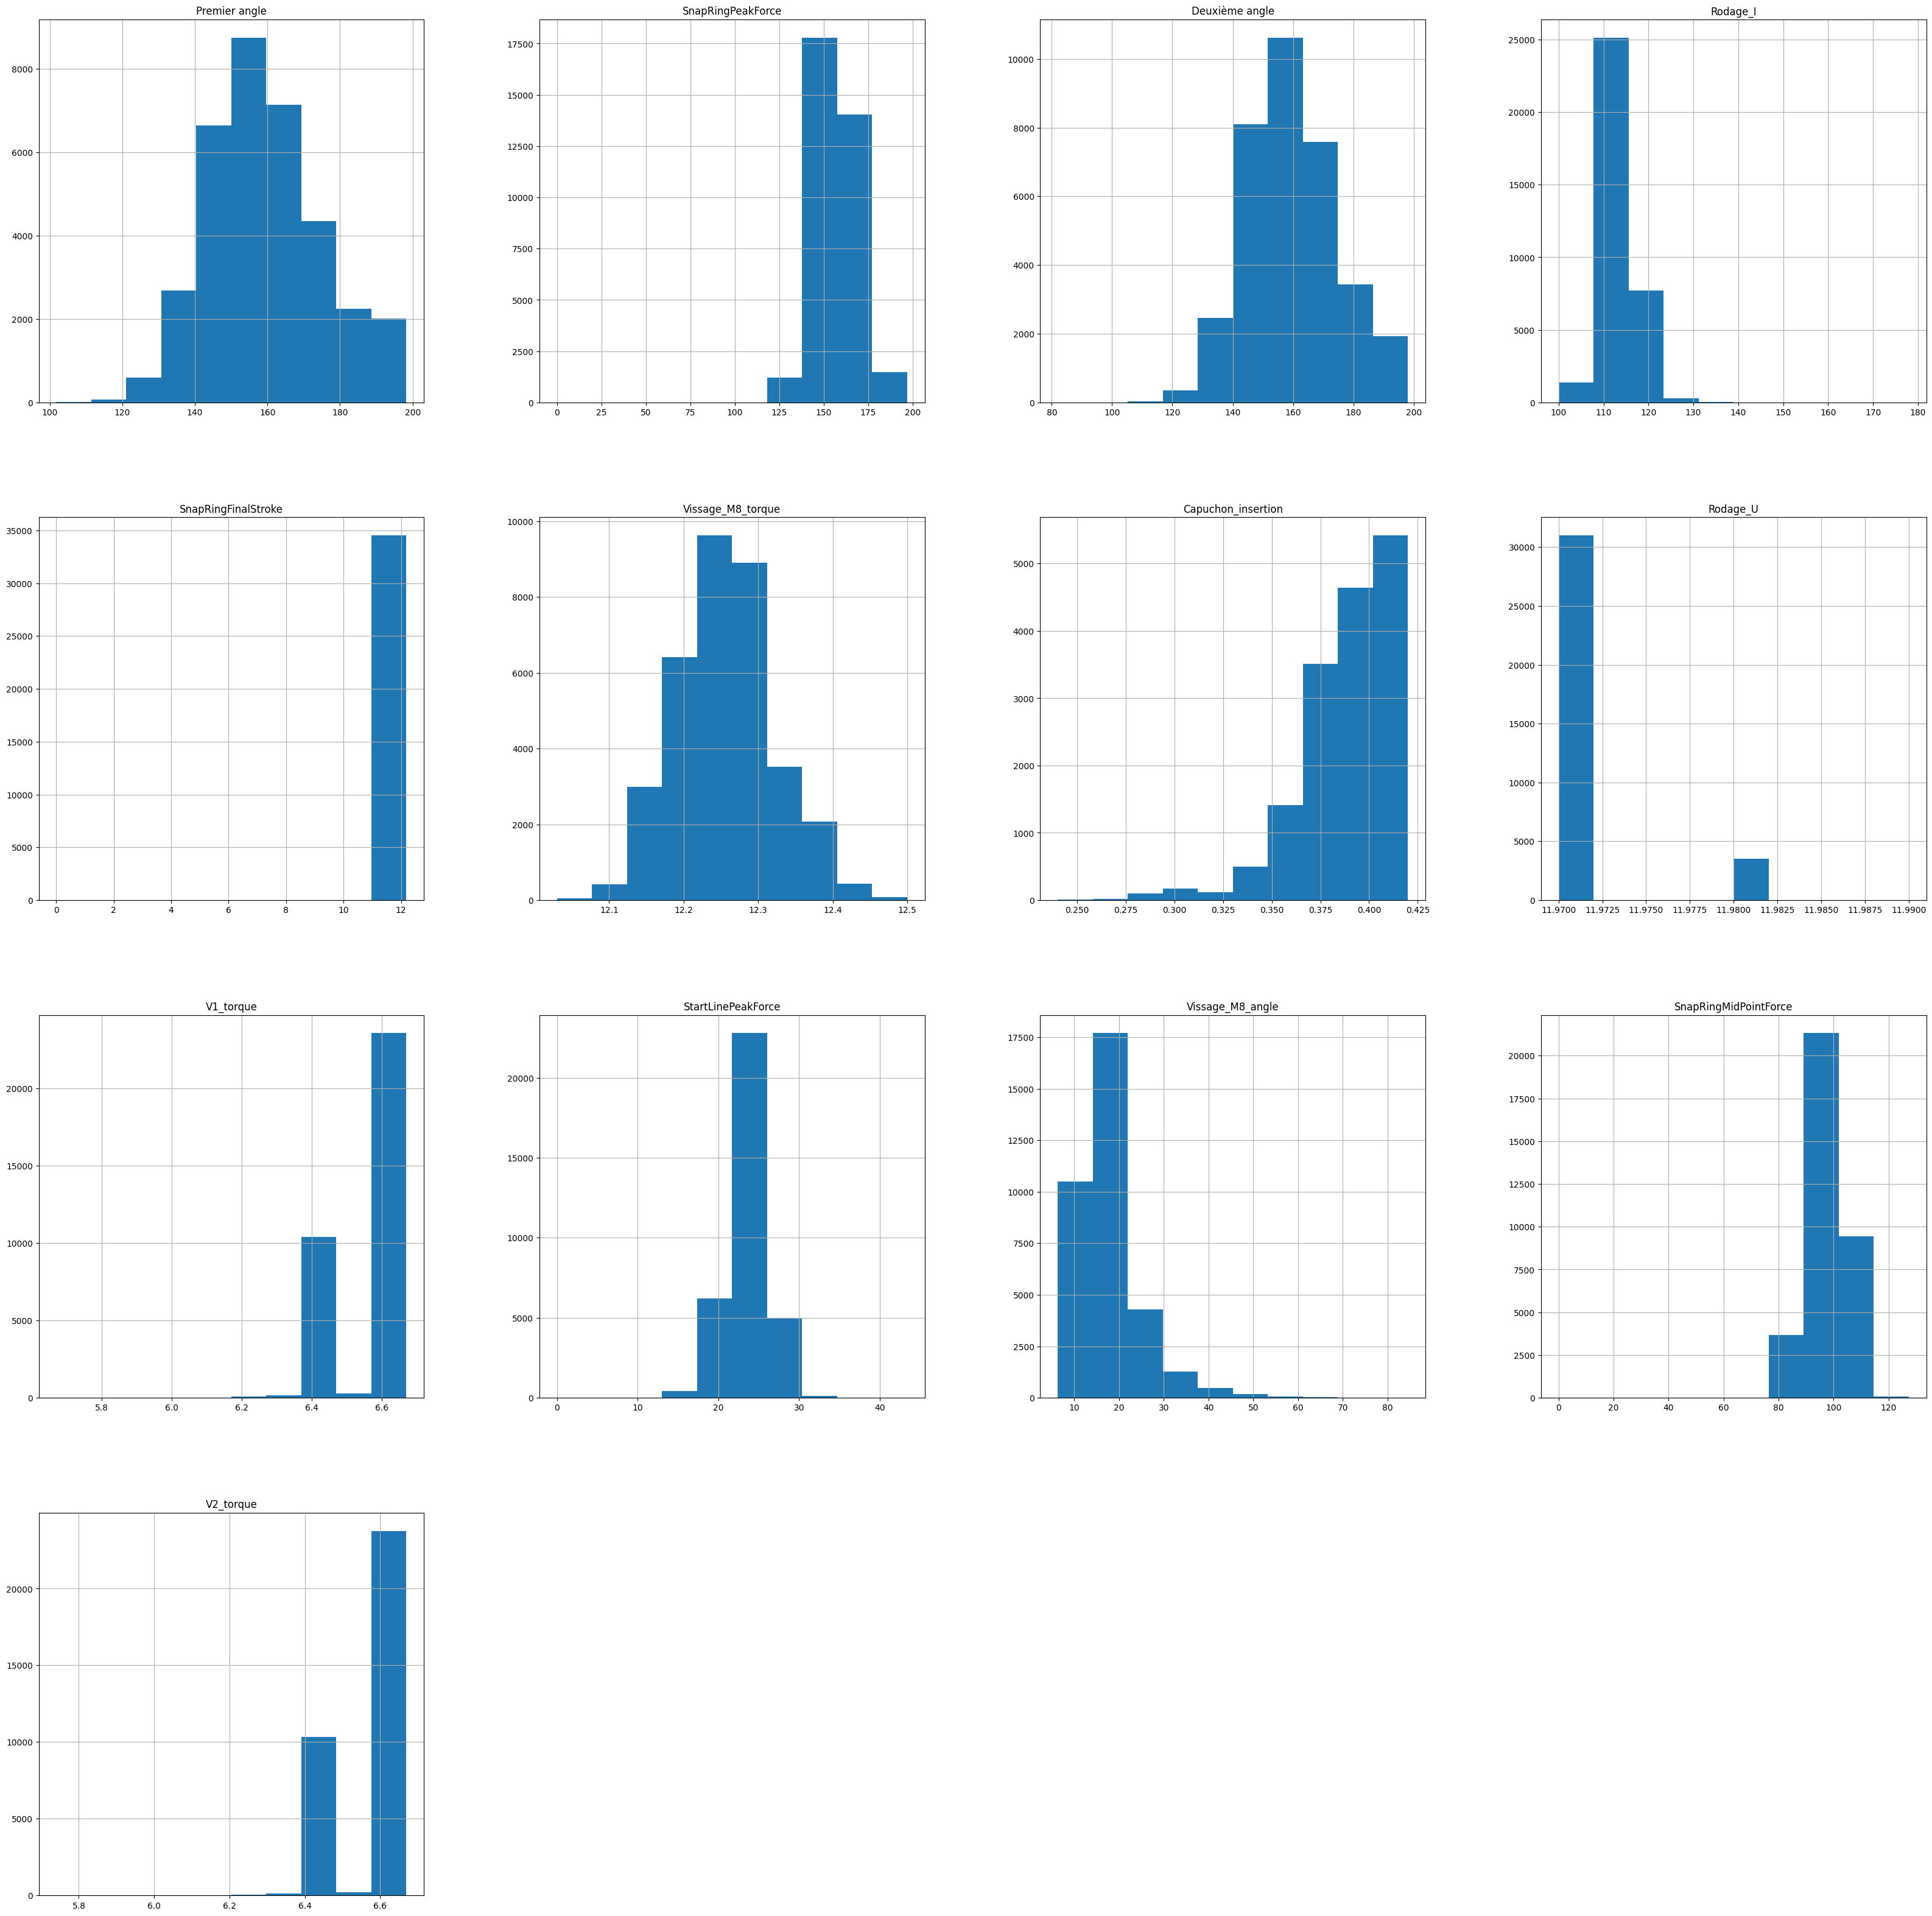

In [20]:
df_training_inputs.hist(layout = (4 , 4), figsize = (40,40))

Histogram Test Input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

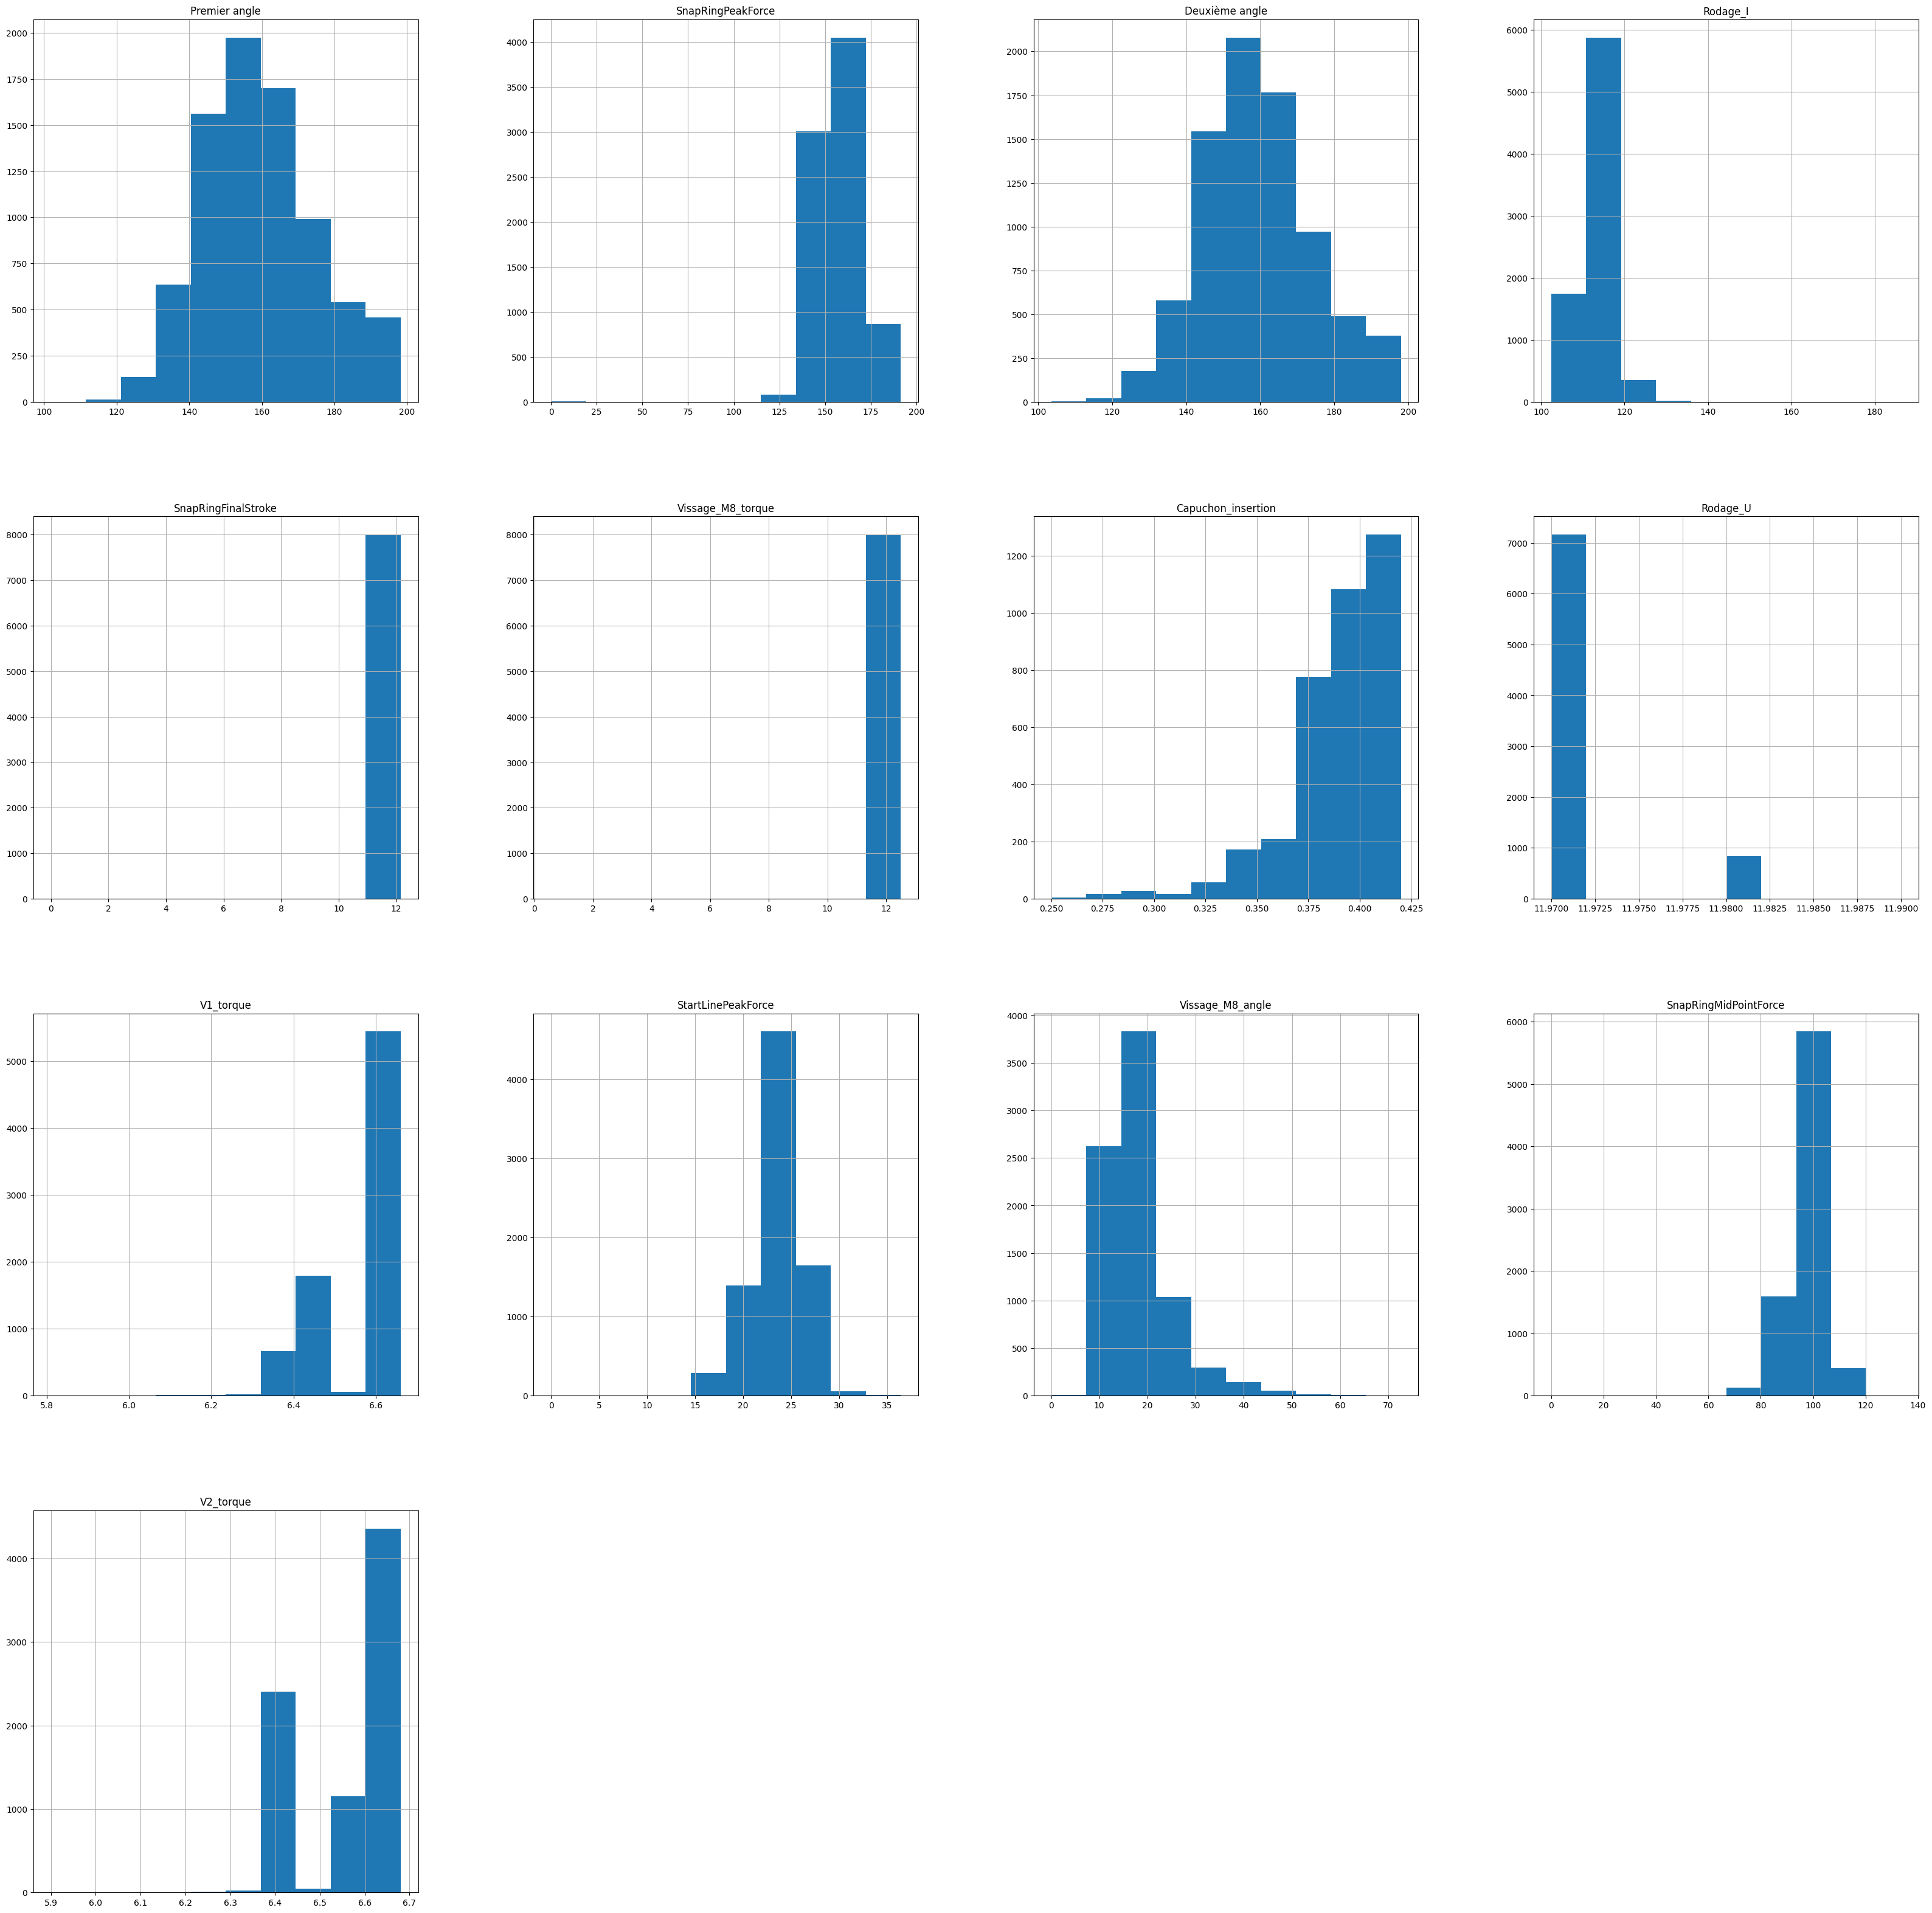

In [21]:
df_test_inputs.hist(layout = (4, 4), figsize = (40,40))

Histogram Training outputs

array([[<Axes: title={'center': 'Binar OP130_Resultat_Global_v'}>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

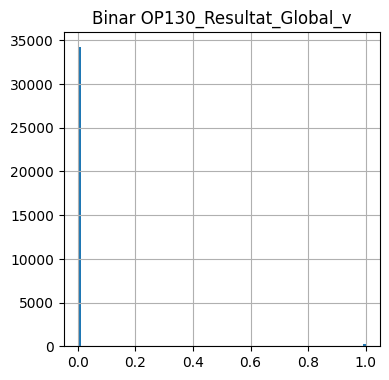

In [22]:
df_training_output.hist(bins = 100, layout = (4, 4), figsize = (20,20))

**BoxPlot**

Training Inputs

In [23]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2023-05-15 14:52:23--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-05-15 14:52:23 (34.1 MB/s) - ‘visualization.py’ saved [13023/13023]



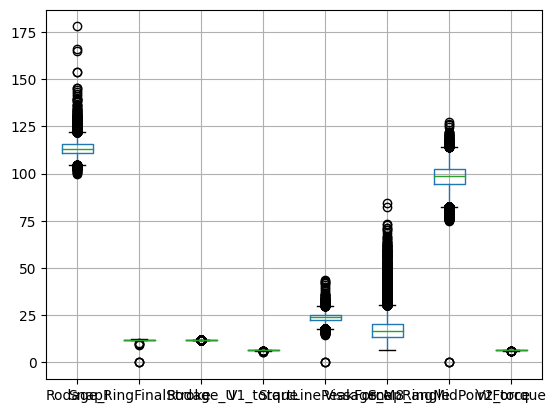

In [80]:
bp = df_training_inputs.boxplot()

AttributeError: ignored

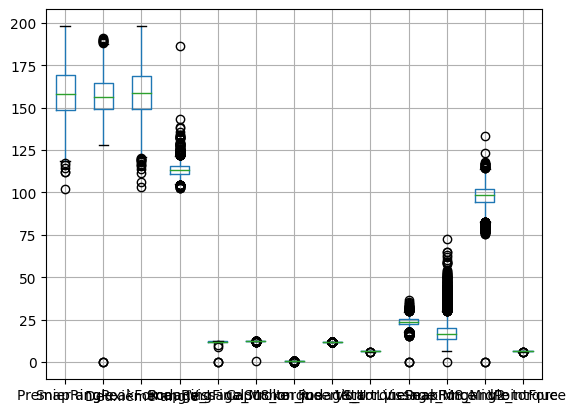

In [55]:
ax = df_test_inputs.boxplot()


visualization.rotate_labels(ax)
plt.show()

Scaling features

In [40]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_test_inputs_cleaned = df_test_inputs.drop(columns=["PROC_TRACEINFO"])


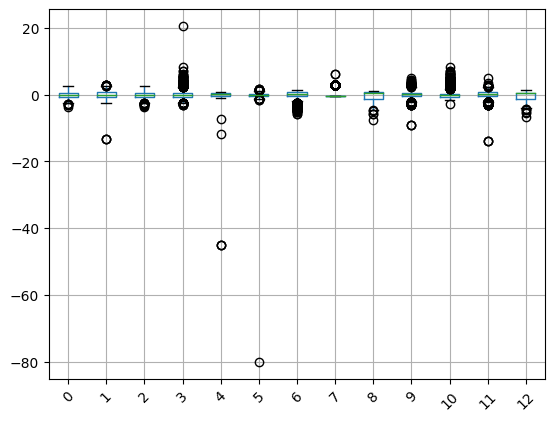

In [51]:
scaler = StandardScaler()
X = df_test_inputs_cleaned.values
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled)
bp = df_scaled.boxplot()
bp.tick_params(axis='x', labelrotation=45)

Scatter Matrix

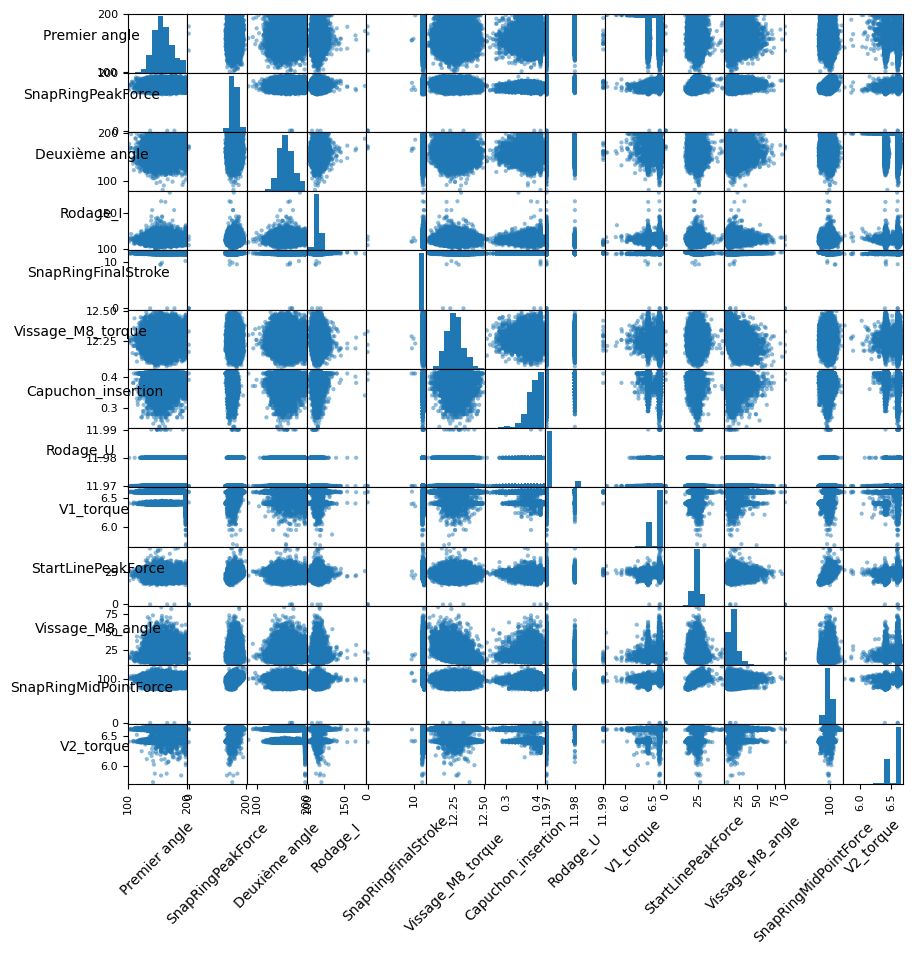

In [27]:
sm = scatter_matrix(df_training_inputs,
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

Definition des columns qui ont necessité de transformation

In [120]:
cols_change = ['Rodage_I','Rodage_U','Vissage_M8_angle','SnapRingFinalStroke', 'V1_torque','SnapRingMidPointForce']
df_training_inputs


,PROC_TRACEINFO,Premier angle,SnapRingPeakForce,Deuxième angle,Rodage_I,SnapRingFinalStroke,Vissage_M8_torque,Capuchon_insertion,Rodage_U,V1_torque,...,Vissage_M8_angle,SnapRingMidPointForce,V2_torque,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
0,I-B-XA1207672-190429-00688,Premier angle,SnapRingPeakForce,Deuxième angle,113.64,12.04,Vissage_M8_torque,Capuchon_insertion,11.97,6.62,...,18.8,109.62,6.60,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
1,I-B-XA1207672-190828-00973,Premier angle,SnapRingPeakForce,Deuxième angle,109.77,12.12,Vissage_M8_torque,Capuchon_insertion,11.97,6.41,...,18.5,105.48,6.40,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
2,I-B-XA1207672-190712-03462,Premier angle,SnapRingPeakForce,Deuxième angle,109.79,11.86,Vissage_M8_torque,Capuchon_insertion,11.97,6.62,...,17.5,100.03,6.61,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
3,I-B-XA1207672-190803-00051,Premier angle,SnapRingPeakForce,Deuxième angle,113.25,11.82,Vissage_M8_torque,Capuchon_insertion,11.97,6.62,...,15.6,104.94,6.61,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
4,I-B-XA1207672-190508-03248,Premier angle,SnapRingPeakForce,Deuxième angle,112.88,12.07,Vissage_M8_torque,Capuchon_insertion,11.97,6.62,...,33.6,99.19,6.61,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190520-00031,Premier angle,SnapRingPeakForce,Deuxième angle,110.65,11.88,Vissage_M8_torque,Capuchon_insertion,11.98,6.61,...,14.8,98.76,6.61,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
34511,I-B-XA1207672-190906-00270,Premier angle,SnapRingPeakForce,Deuxième angle,108.14,12.04,Vissage_M8_torque,Capuchon_insertion,11.97,6.41,...,15.5,98.37,6.40,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
34512,I-B-XA1207672-190429-00930,Premier angle,SnapRingPeakForce,Deuxième angle,112.77,12.09,Vissage_M8_torque,Capuchon_insertion,11.97,6.62,...,24.4,92.92,6.62,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce
34513,I-B-XA1207672-190424-02120,Premier angle,SnapRingPeakForce,Deuxième angle,111.19,12.06,Vissage_M8_torque,Capuchon_insertion,11.97,6.60,...,13.6,101.21,6.60,Rodage_I_log,Rodage_U_log,Vissage_M8_angle_log,SnapRingFinalStroke_exp,V1_torque_exp,SnapRingMidPointForce_exp,StarLinePeakForce


Columns qui n'ont rien changé

In [98]:
cols_Nchange = ['Premier angle', 'SnapRingPeakForce','Deuxième angle', 'Vissage_M8_torque','Capuchon_insertion','StarLinePeakForce']

Definition des changements

In [28]:
cols_to_transform = ['Rodage_I','Rodage_U','Vissage_M8_angle'];

cols_transformed = [s + "_log" for s in cols_to_transform]
df_training_inputs[cols_transformed] = df_training_inputs[cols_to_transform].transform(
                        func=lambda x : np.log(x))


In [38]:
cols_to_transform1 = ['SnapRingFinalStroke', 'V1_torque','SnapRingMidPointForce']
cols_transformed1 = [s + "_exp" for s in cols_to_transform1]

df_training_inputs[cols_transformed1] = df_training_inputs[cols_to_transform1].transform(
    func=lambda x: np.exp(1+x))


Definition des columns dejà changé

In [116]:
cols_change_transf = cols_transformed + cols_transformed1
cols_change_transf

['Rodage_I_log',
 'Rodage_U_log',
 'Vissage_M8_angle_log',
 'SnapRingFinalStroke_exp',
 'V1_torque_exp',
 'SnapRingMidPointForce_exp']

In [117]:
columns_to_plot = cols_Nchange + cols_change_transf
columns_to_plot

['Premier angle',
 'SnapRingPeakForce',
 'Deuxième angle',
 'Vissage_M8_torque',
 'Capuchon_insertion',
 'StarLinePeakForce',
 'Rodage_I_log',
 'Rodage_U_log',
 'Vissage_M8_angle_log',
 'SnapRingFinalStroke_exp',
 'V1_torque_exp',
 'SnapRingMidPointForce_exp']

In [87]:
columns_to_plot_after_transf = columns_to_plot.copy()

for feature in cols_to_transform:
    if feature in columns_to_plot_after_transf:
        columns_to_plot_after_transf.remove(feature)

for feature in cols_transformed:
    columns_to_plot_after_transf.insert(0, feature)


N'ai rien changé

In [112]:
sm = scatter_matrix(df_training_inputs[columns_to_plot],
                   figsize=(10,10), color = 'red')
visualization.rotate_labels(sm)
plt.show()

ValueError: ignored

<Figure size 1000x1000 with 0 Axes>

Visualization de caracteristique à changer

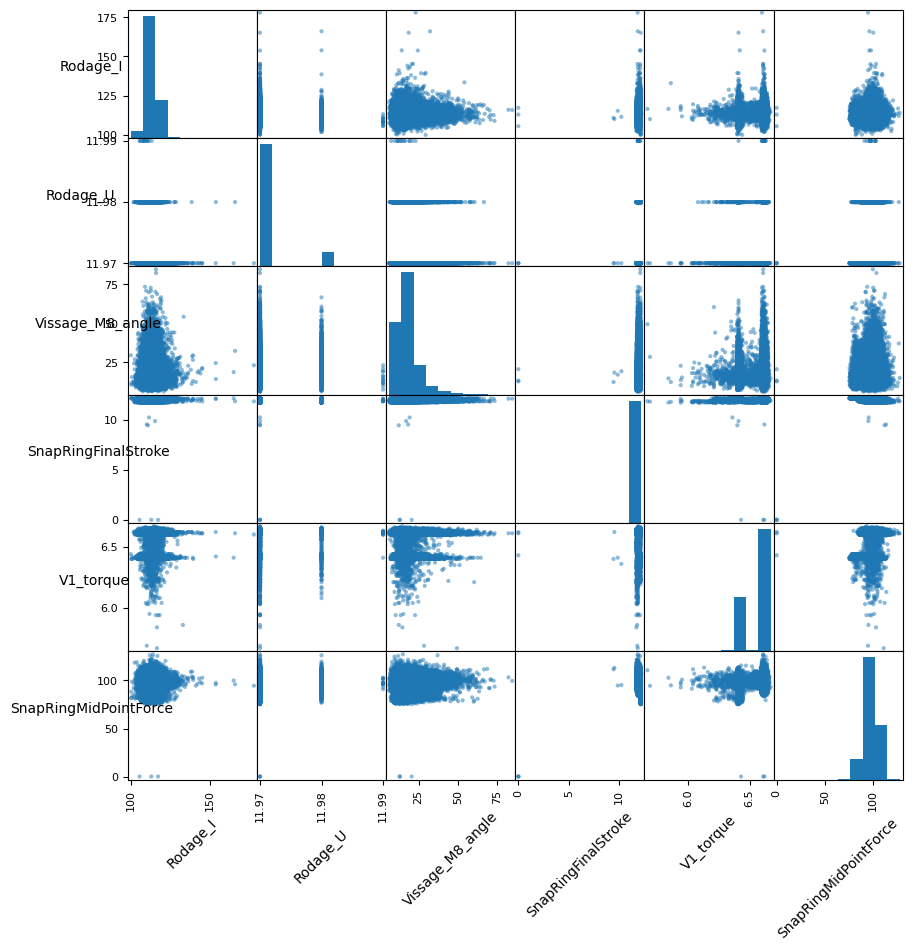

In [35]:
sm = scatter_matrix(df_training_inputs[cols_change],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

Sm des paramètres changés

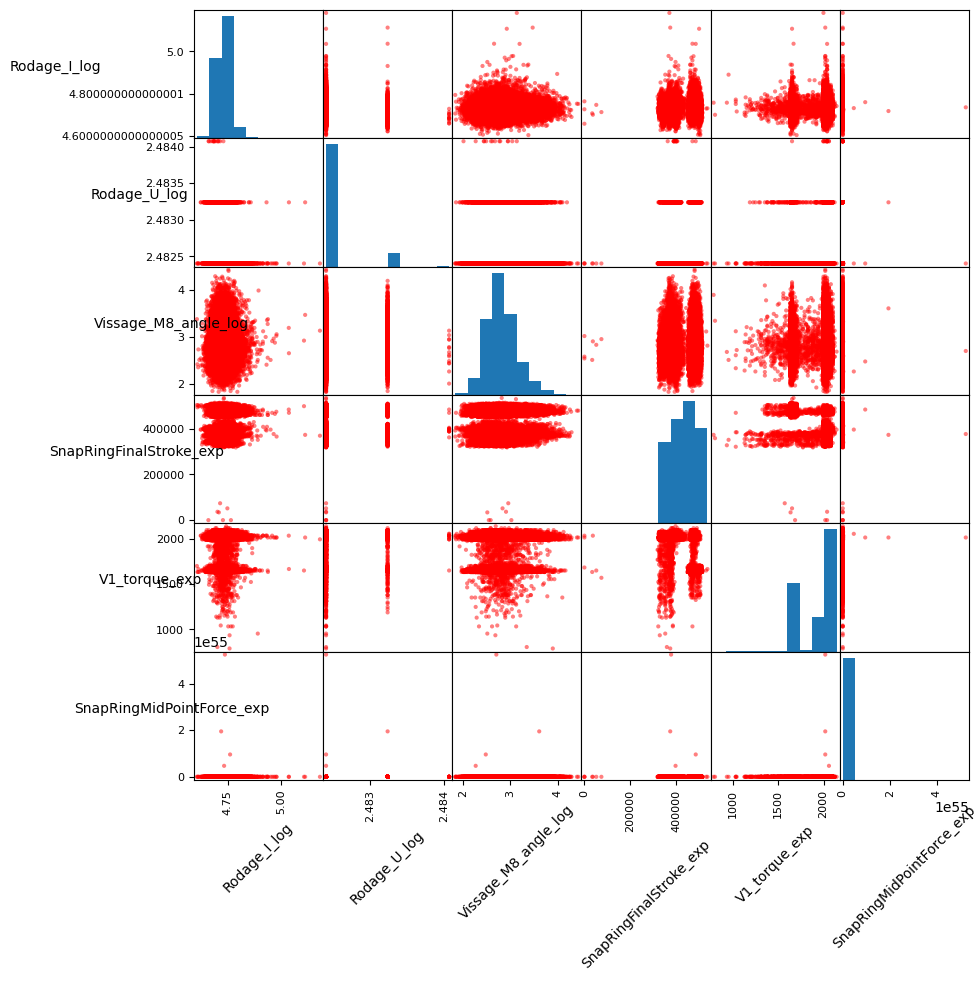

In [60]:
sm = scatter_matrix(df_training_inputs[cols_change_transf],
                   figsize=(10,10), color='red')

visualization.rotate_labels(sm)
plt.show()

In [31]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

help(feature_engineering)

--2023-05-15 14:53:53--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-05-15 14:53:53 (43.0 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
      

In [32]:
feature_engineering.get_features_correlated_to_target(df_training_inputs,
                                    target_feature='Premier angle').head(10)

/content/feature_engineering.py:79: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr().round(2)


Premier angle            1.00
Deuxième angle           0.19
SnapRingFinalStroke     -0.09
SnapRingMidPointForce    0.07
V2_torque                0.07
StartLinePeakForce       0.06
Rodage_I                 0.04
Rodage_I_log             0.04
Vissage_M8_torque       -0.02
Capuchon_insertion      -0.02
Name: Premier angle, dtype: float64

In [81]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

--2023-05-15 16:39:55--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py.1’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-05-15 16:39:56 (32.5 MB/s) - ‘feature_engineering.py.1’ saved [2206/2206]

